ENERGY ARBITRAGE VALUE ANALYSIS including price forecast with XGB instead of perfect foresight prices


In [2]:
##############################
## IMPORT AND PREPARE DATA ##
############################
import numpy as np
import pandas as pd
from datetime import datetime
from typing import List
from pyomo.environ import *

# Import data
filename1 = 'HOEP_2015-2019_dataset.csv'
XGboost_2016 = pd.read_csv('HOEP_2016_forecast_XGB1.csv')
XGboost6_2016 = pd.read_csv('HOEP_2016_forecast_XGB6.csv')
XGboost12_2016 = pd.read_csv('HOEP_2016_forecast_XGB12.csv')
XGboost24_2016 = pd.read_csv('HOEP_2016_forecast_XGB24.csv')

dataframe = pd.read_csv(filename1)
cols_of_interest = ["Date","Hour","HOEP"]
dataframe = dataframe[cols_of_interest]

dataframe['HOEP_lag360'] = dataframe.HOEP.shift(360)
dataframe['HOEP_lag168'] = dataframe.HOEP.shift(168)
dataframe['HOEP_lag24'] = dataframe.HOEP.shift(24)
dataframe['Datetime'] = pd.to_datetime(dataframe.Date) + pd.to_timedelta(dataframe.Hour, unit='h')

df_2016 = dataframe.loc[8760:17903].reset_index(drop=True)
df_2016['XGB'] = XGboost_2016.Forecast
df_2016['XGB6'] = XGboost6_2016.Forecast
df_2016['XGB12'] = XGboost12_2016.Forecast
df_2016['XGB24'] = XGboost24_2016.Forecast

data = df_2016.copy()
data = data.fillna(0)

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

filename1 = 'HOEP_2015-2019_dataset.csv'
dataframe = pd.read_csv(filename1)
dataframe['Datetime'] = pd.to_datetime(dataframe.Date) + pd.to_timedelta(dataframe.Hour, unit='h')
dataframe = dataframe[['Datetime','Date','Hour','Year','Month','Weekday','OntDem']]
dataframe['Day'] = dataframe.Datetime.dt.day
df_2015 = dataframe.loc[:8759].reset_index(drop=True)
df_2016 = dataframe.loc[8760:17903].reset_index(drop=True)
df_2017 = dataframe.loc[17544:26663].reset_index(drop=True)
df_2018 = dataframe.loc[26304:35423].reset_index(drop=True)
df_2019 = dataframe.loc[35064:].reset_index(drop=True)

hist_peaks = df_2015.nlargest(10, ['OntDem'])
hist_peaks = hist_peaks.append(df_2016.nlargest(10, ['OntDem']), ignore_index=True)
hist_peaks = hist_peaks.append(df_2017.nlargest(10, ['OntDem']), ignore_index=True)
hist_peaks = hist_peaks.append(df_2018.nlargest(10, ['OntDem']), ignore_index=True)
hist_peaks = hist_peaks.append(df_2019.nlargest(10, ['OntDem']), ignore_index=True)
#plt.hist(hist_peaks.Month)
hist_peaks

,Datetime,Date,Hour,Year,Month,Weekday,OntDem,Day
0,2015-07-28 17:00:00,2015-07-28,17,2015,7,1,22516,28
1,2015-07-29 17:00:00,2015-07-29,17,2015,7,2,22471,29
2,2015-08-17 17:00:00,2015-08-17,17,2015,8,0,22383,17
3,2015-07-28 18:00:00,2015-07-28,18,2015,7,1,22371,28
4,2015-07-29 18:00:00,2015-07-29,18,2015,7,2,22310,29
5,2015-07-29 16:00:00,2015-07-29,16,2015,7,2,22274,29
6,2015-07-29 13:00:00,2015-07-29,13,2015,7,2,22260,29
7,2015-07-28 19:00:00,2015-07-28,19,2015,7,1,22212,28
8,2015-08-17 18:00:00,2015-08-17,18,2015,8,0,22196,17
9,2015-08-17 16:00:00,2015-08-17,16,2015,8,0,22155,17


In [3]:
########################################################################################
####################################  2016 #############################################
### OPTIMIZATION WITH 12h XGBoost rolling horizon using Model 1 (M1) price forecast ###
#######################################################################################

# M1 2016, horizon = 12h
start_time = datetime.now()

list_Date = []
list_HOEP = []
list_XGB = []
list_XGB12 = []
list_SOC = []
list_Ein = []
list_Eout = []
list_value = []

horizon = 11
duration = 12

for i in range(0,8760): 
    
    df = data.loc[0+i:horizon+i]
    df.reset_index(inplace=True)

    model = ConcreteModel()
    
    # Variables of the model
    model.T = Set(initialize=df.index, ordered=True)
    model.Rmax = Param(initialize=1, within=Any) 
    model.Smax = Param(initialize=duration, within=Any)
    model.Dmax = Param(initialize=duration, within=Any) 

    model.Ein = Var(model.T, domain=NonNegativeReals)  
    model.Eout = Var(model.T, domain=NonNegativeReals) 
    model.Z = Var(model.T, domain=NonNegativeReals)  
    model.L = Var(model.T, domain=NonNegativeReals) 
    model.value = Var(model.T)
    model.eta = Param(initialize=0.86)

    # Constraints
    def storage_state(model, t):
        if df['Datetime'].iloc[0] == data.Datetime[0]:  
            if t == model.T.first():
                return model.Z[t] == duration/2  
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
        else:
            if t == model.T.first():
                return model.Z[t] == SOC + model.Ein[t]*model.eta - model.Eout[t]
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
    model.charge_state = Constraint(model.T, rule=storage_state)

    def discharge_constraint(model, t):
        return model.Eout[t] <= model.Rmax
    model.discharge = Constraint(model.T, rule=discharge_constraint)

    def charge_constraint(model, t):
        return model.Ein[t] <= model.Rmax
    model.charge = Constraint(model.T, rule=charge_constraint)

    def positive_charge(model, t): 
        return model.Eout[t] <= model.Z[t] 
    model.positive_charge = Constraint(model.T, rule=positive_charge)

    def max_SOC(model, t): 
        return model.Z[t] <= model.Smax
    model.max_SOC = Constraint(model.T, rule=max_SOC)
    
    def value_constraint(model, t):
        if t == model.T.first():
            return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'XGB']
        else:
            return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'XGB12']               
    model.value_constraint = Constraint(model.T, rule=value_constraint)

    # Objective function and optimization
    profits = sum(model.value[t] for t in model.T)
    model.objective = Objective(expr=profits, sense=maximize)

    # Solve model
    solver = SolverFactory('glpk')
    solver.solve(model) 
    
    # Extract model output in list
    Date = list(df['Datetime'])[0]
    HOEP = list(df['HOEP'])[0]
    XGB = list(df['XGB'])[0]
    XGB12 = list(df['XGB12'])[0]
    SOC = list(model.Z.get_values().values())[0]
    Ein= list(model.Ein.get_values().values())[0]
    Eout = list(model.Eout.get_values().values())[0]
    value = list(model.value.get_values().values())[0]
    
    list_Date.append(Date)
    list_HOEP.append(HOEP)
    list_XGB.append(XGB)
    list_XGB12.append(XGB12)
    list_SOC.append(SOC)
    list_Ein.append(Ein)
    list_Eout.append(Eout)
    list_value.append(value)

# Present final results in a dataframe
results = pd.DataFrame(list_Date, columns=['Datetime'])
results['HOEP'] = list_HOEP
results['XGB'] = list_XGB
results['XGB12'] = list_XGB12
results['Ein'] = list_Ein
results['Eout'] = list_Eout
results['SOC'] = list_SOC
results['value'] = list_value
results['real_value'] = (results.Eout - results.Ein)*results.HOEP
results = results.round(2)
remaining_value = (results.loc[results['Eout'] > 0, 'HOEP'].mean() * results.SOC.tail(1)) 

print("running time:", datetime.now() - start_time)
print("real value of storage:", (results.real_value.sum() + remaining_value.item())/1000)
XGB_2016 = (results.real_value.sum() + remaining_value.item())/1000
results

running time: 0:11:44.698377
real value of storage: 31.971133830583753


,Datetime,HOEP,XGB,XGB12,Ein,Eout,SOC,value,real_value
0,2016-01-01 01:00:00,-1.09,-0.02,0.40,1.0,0.00,6.00,0.02,1.09
1,2016-01-01 02:00:00,-2.41,-2.14,0.60,1.0,0.00,6.86,2.14,2.41
2,2016-01-01 03:00:00,-4.23,-2.06,0.60,1.0,0.00,7.72,2.06,4.23
3,2016-01-01 04:00:00,-4.40,-2.33,0.42,1.0,0.00,8.58,2.33,4.40
4,2016-01-01 05:00:00,-4.44,-2.17,0.60,1.0,0.00,9.44,2.17,4.44
...,...,...,...,...,...,...,...,...,...
8755,2016-12-30 20:00:00,11.09,3.66,2.92,0.0,1.00,3.00,3.66,11.09
8756,2016-12-30 21:00:00,10.41,6.08,3.18,0.0,1.00,2.00,6.08,10.41
8757,2016-12-30 22:00:00,14.37,3.01,3.18,0.0,1.00,1.00,3.01,14.37
8758,2016-12-30 23:00:00,16.32,11.95,1.33,0.0,0.50,0.50,5.98,8.16


In [4]:
########################################################################################
####################################  2016 #############################################
### OPTIMIZATION WITH 12h XGBoost rolling horizon using Model 2 (M2) price forecast ###
#######################################################################################

# M2 2016, horizon = 24h
start_time = datetime.now()

list_Date = []
list_HOEP = []
list_XGB = []
list_XGB24 = []
list_SOC = []
list_Ein = []
list_Eout = []
list_value = []

horizon = 23
duration = 12

for i in range(0,8760): 
    
    df = data.loc[0+i:horizon+i]
    df.reset_index(inplace=True)

    model = ConcreteModel()
    
    # Variables of the model
    model.T = Set(initialize=df.index, ordered=True)
    model.Rmax = Param(initialize=1, within=Any) 
    model.Smax = Param(initialize=duration, within=Any)
    model.Dmax = Param(initialize=duration, within=Any) 

    model.Ein = Var(model.T, domain=NonNegativeReals)  
    model.Eout = Var(model.T, domain=NonNegativeReals) 
    model.Z = Var(model.T, domain=NonNegativeReals)  
    model.L = Var(model.T, domain=NonNegativeReals) 
    model.value = Var(model.T)
    model.eta = Param(initialize=0.86)

    # Constraints
    def storage_state(model, t):
        if df['Datetime'].iloc[0] == data.Datetime[0]:  
            if t == model.T.first():
                return model.Z[t] == duration/2  
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
        else:
            if t == model.T.first():
                return model.Z[t] == SOC + model.Ein[t]*model.eta - model.Eout[t]
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
    model.charge_state = Constraint(model.T, rule=storage_state)

    def discharge_constraint(model, t):
        return model.Eout[t] <= model.Rmax
    model.discharge = Constraint(model.T, rule=discharge_constraint)

    def charge_constraint(model, t):
        return model.Ein[t] <= model.Rmax
    model.charge = Constraint(model.T, rule=charge_constraint)

    def positive_charge(model, t): 
        return model.Eout[t] <= model.Z[t] 
    model.positive_charge = Constraint(model.T, rule=positive_charge)

    def max_SOC(model, t): 
        return model.Z[t] <= model.Smax
    model.max_SOC = Constraint(model.T, rule=max_SOC)
    
    def value_constraint(model, t):
        if t == model.T.first():
            return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'XGB']
        else:
            return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'XGB24']               
    model.value_constraint = Constraint(model.T, rule=value_constraint)

    # Objective function and optimization
    profits = sum(model.value[t] for t in model.T)
    model.objective = Objective(expr=profits, sense=maximize)

    # Solve model
    solver = SolverFactory('glpk')
    solver.solve(model) 
    
    # Extract model output in list
    Date = list(df['Datetime'])[0]
    HOEP = list(df['HOEP'])[0]
    XGB = list(df['XGB'])[0]
    XGB24 = list(df['XGB24'])[0]
    SOC = list(model.Z.get_values().values())[0]
    Ein= list(model.Ein.get_values().values())[0]
    Eout = list(model.Eout.get_values().values())[0]
    value = list(model.value.get_values().values())[0]
    
    list_Date.append(Date)
    list_HOEP.append(HOEP)
    list_XGB.append(XGB)
    list_XGB24.append(XGB24)
    list_SOC.append(SOC)
    list_Ein.append(Ein)
    list_Eout.append(Eout)
    list_value.append(value)

# Present final results in a dataframe
results = pd.DataFrame(list_Date, columns=['Datetime'])
results['HOEP'] = list_HOEP
results['XGB'] = list_XGB
results['XGB24'] = list_XGB24
results['Ein'] = list_Ein
results['Eout'] = list_Eout
results['SOC'] = list_SOC
results['value'] = list_value
results['real_value'] = (results.Eout - results.Ein)*results.HOEP
results = results.round(2)
remaining_value = (results.loc[results['Eout'] > 0, 'HOEP'].mean() * results.SOC.tail(1)) 

print("running time:", datetime.now() - start_time)
print("real value of storage:", (results.real_value.sum() + remaining_value.item())/1000)
XGB_2016 = (results.real_value.sum() + remaining_value.item())/1000
results

running time: 0:11:48.258658
real value of storage: 31.18661367692308


,Datetime,HOEP,XGB,XGB24,Ein,Eout,SOC,value,real_value
0,2016-01-01 01:00:00,-1.09,-0.02,0.40,1.0,0.00,6.00,0.02,1.09
1,2016-01-01 02:00:00,-2.41,-2.14,0.63,1.0,0.00,6.86,2.14,2.41
2,2016-01-01 03:00:00,-4.23,-2.06,0.63,1.0,0.00,7.72,2.06,4.23
3,2016-01-01 04:00:00,-4.40,-2.33,0.39,1.0,0.00,8.58,2.33,4.40
4,2016-01-01 05:00:00,-4.44,-2.17,0.52,1.0,0.00,9.44,2.17,4.44
...,...,...,...,...,...,...,...,...,...
8755,2016-12-30 20:00:00,11.09,3.66,1.19,0.0,0.32,0.32,1.17,3.55
8756,2016-12-30 21:00:00,10.41,6.08,1.19,0.0,0.16,0.16,0.97,1.67
8757,2016-12-30 22:00:00,14.37,3.01,1.19,0.0,0.08,0.08,0.24,1.15
8758,2016-12-30 23:00:00,16.32,11.95,0.95,0.0,0.04,0.04,0.48,0.65


In [5]:
########################################################################################
####################################  2016 #############################################
### OPTIMIZATION WITH 12h XGBoost rolling horizon using Model 7 (M7) price forecast ###
#######################################################################################

# M7 2016, horizon = 360h
start_time = datetime.now()

list_Date = []
list_HOEP = []
list_XGB = []
list_XGB12 = []
list_HOEP_lag168 = []
list_HOEP_lag360 = []
list_SOC = []
list_Ein = []
list_Eout = []
list_value = []

horizon = 359
duration = 12

for i in range(0,8760): 
    
    df = data.loc[0+i:horizon+i]
    df.reset_index(inplace=True)

    model = ConcreteModel()
    
    # Variables of the model
    model.T = Set(initialize=df.index, ordered=True)
    model.Rmax = Param(initialize=1, within=Any) 
    model.Smax = Param(initialize=duration, within=Any)
    model.Dmax = Param(initialize=duration, within=Any) 
    model.eta = Param(initialize=0.86)
    model.Ein = Var(model.T, domain=NonNegativeReals)  
    model.Eout = Var(model.T, domain=NonNegativeReals) 
    model.Z = Var(model.T, domain=NonNegativeReals)  
    model.L = Var(model.T, domain=NonNegativeReals) 
    model.value = Var(model.T)
    
    # Constraints
    def storage_state(model, t):
        if df['Datetime'].iloc[0] == data.Datetime[0]:  
            if t == model.T.first():
                return model.Z[t] == duration/2  
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
        else:
            if t == model.T.first():
                return model.Z[t] == SOC + model.Ein[t]*model.eta - model.Eout[t]
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
    model.charge_state = Constraint(model.T, rule=storage_state)

    def discharge_constraint(model, t):
        return model.Eout[t] <= model.Rmax
    model.discharge = Constraint(model.T, rule=discharge_constraint)

    def charge_constraint(model, t):
        return model.Ein[t] <= model.Rmax
    model.charge = Constraint(model.T, rule=charge_constraint)

    def positive_charge(model, t): 
        return model.Eout[t] <= model.Z[t] 
    model.positive_charge = Constraint(model.T, rule=positive_charge)

    def max_SOC(model, t): 
        return model.Z[t] <= model.Smax
    model.max_SOC = Constraint(model.T, rule=max_SOC)
    
    def value_constraint(model, t):
        if t == model.T.first():
            return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'XGB']
        else:
            if t in range(1,12):
                return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'XGB12']
            else:
                if t in range(13,168):
                    return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'HOEP_lag168']
                else:
                    return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'HOEP_lag360']       
    model.value_constraint = Constraint(model.T, rule=value_constraint)

    # Objective function and optimization
    profits = sum(model.value[t] for t in model.T)
    model.objective = Objective(expr=profits, sense=maximize)

    # Solve model
    solver = SolverFactory('ipopt')
    solver.solve(model) 
    
    # Extract model output in list
    Date = list(df['Datetime'])[0]
    HOEP = list(df['HOEP'])[0]
    XGB = list(df['XGB'])[0]
    XGB12 = list(df['XGB12'])[0]
    HOEP_lag168 = list(df['HOEP_lag168'])[0]
    HOEP_lag360 = list(df['HOEP_lag360'])[0]
    SOC = list(model.Z.get_values().values())[0]
    Ein= list(model.Ein.get_values().values())[0]
    Eout = list(model.Eout.get_values().values())[0]
    value = list(model.value.get_values().values())[0]
    
    list_Date.append(Date)
    list_HOEP.append(HOEP)
    list_XGB.append(XGB)
    list_XGB12.append(XGB12)
    list_HOEP_lag168.append(HOEP_lag168)
    list_HOEP_lag360.append(HOEP_lag360)
    list_SOC.append(SOC)
    list_Ein.append(Ein)
    list_Eout.append(Eout)
    list_value.append(value)

# Present final results in a dataframe
results = pd.DataFrame(list_Date, columns=['Datetime'])
results['HOEP'] = list_HOEP
results['XGB'] = list_XGB
results['XGB12'] = list_XGB12
results['HOEP_lag168'] = list_HOEP_lag168
results['HOEP_lag360'] = list_HOEP_lag360
results['Ein'] = list_Ein
results['Eout'] = list_Eout
results['SOC'] = list_SOC
results['value'] = list_value
results['real_value'] = (results.Eout - results.Ein)*results.HOEP
results = results.round(2)
remaining_value = (results.loc[results['Eout'] > 0, 'HOEP'].mean() * results.SOC.tail(1)) 

print("running time:", datetime.now() - start_time)
print("real value of storage:", (results.real_value.sum() + remaining_value.item())/1000)
XGB_2016 = (results.real_value.sum() + remaining_value.item())/1000
results

running time: 2:50:46.418731
real value of storage: 35.49770696802647


,Datetime,HOEP,XGB,XGB12,HOEP_lag168,HOEP_lag360,Ein,Eout,SOC,value,real_value
0,2016-01-01 01:00:00,-1.09,-0.02,0.40,0.72,-2.78,1.0,0.0,6.00,0.02,1.09
1,2016-01-01 02:00:00,-2.41,-2.14,0.60,-4.25,-3.79,1.0,0.0,6.86,2.14,2.41
2,2016-01-01 03:00:00,-4.23,-2.06,0.60,-4.35,-4.21,1.0,0.0,7.72,2.06,4.23
3,2016-01-01 04:00:00,-4.40,-2.33,0.42,-4.40,-4.20,1.0,0.0,8.58,2.33,4.40
4,2016-01-01 05:00:00,-4.44,-2.17,0.60,-4.40,-4.18,1.0,0.0,9.44,2.17,4.44
...,...,...,...,...,...,...,...,...,...,...,...
8755,2016-12-30 20:00:00,11.09,3.66,2.92,15.77,51.82,0.0,1.0,8.00,3.66,11.09
8756,2016-12-30 21:00:00,10.41,6.08,3.18,36.44,50.82,0.0,1.0,7.00,6.08,10.41
8757,2016-12-30 22:00:00,14.37,3.01,3.18,42.96,50.93,0.0,1.0,6.00,3.01,14.37
8758,2016-12-30 23:00:00,16.32,11.95,1.33,5.77,38.98,0.0,1.0,5.00,11.95,16.32


In [2]:
########################################################################################
####################################  2016 #############################################
### OPTIMIZATION WITH 12h XGBoost rolling horizon using Model 9 (M9) price forecast ###
#######################################################################################

# M9 2016, horizon = 168h
start_time = datetime.now()

list_Date = []
list_HOEP = []
list_XGB = []
list_XGB12 = []
list_XGB24 = []
list_HOEP_lag168 = []
list_SOC = []
list_Ein = []
list_Eout = []
list_value = []

horizon = 167
duration = 12

for i in range(0,8760): 
    
    df = data.loc[0+i:horizon+i]
    df.reset_index(inplace=True)

    model = ConcreteModel()
    
    # Variables of the model
    model.T = Set(initialize=df.index, ordered=True)
    model.Rmax = Param(initialize=1, within=Any) 
    model.Smax = Param(initialize=duration, within=Any)
    model.Dmax = Param(initialize=duration, within=Any) 
    model.eta = Param(initialize=0.86)
    model.Ein = Var(model.T, domain=NonNegativeReals)  
    model.Eout = Var(model.T, domain=NonNegativeReals) 
    model.Z = Var(model.T, domain=NonNegativeReals)  
    model.L = Var(model.T, domain=NonNegativeReals) 
    model.value = Var(model.T)
    
    # Constraints
    def storage_state(model, t):
        if df['Datetime'].iloc[0] == data.Datetime[0]:  
            if t == model.T.first():
                return model.Z[t] == duration/2  
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
        else:
            if t == model.T.first():
                return model.Z[t] == SOC + model.Ein[t]*model.eta - model.Eout[t]
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
    model.charge_state = Constraint(model.T, rule=storage_state)

    def discharge_constraint(model, t):
        return model.Eout[t] <= model.Rmax
    model.discharge = Constraint(model.T, rule=discharge_constraint)

    def charge_constraint(model, t):
        return model.Ein[t] <= model.Rmax
    model.charge = Constraint(model.T, rule=charge_constraint)

    def positive_charge(model, t): 
        return model.Eout[t] <= model.Z[t] 
    model.positive_charge = Constraint(model.T, rule=positive_charge)

    def max_SOC(model, t): 
        return model.Z[t] <= model.Smax
    model.max_SOC = Constraint(model.T, rule=max_SOC)
    
    def value_constraint(model, t):
        if t == model.T.first():
            return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'XGB']
        else:
            if t in range(1,12):
                return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'XGB12']
            else:
                if t in range(12,24):
                    return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'XGB24']
                else:
                    return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'HOEP_lag168']      
    model.value_constraint = Constraint(model.T, rule=value_constraint)

    # Objective function and optimization
    profits = sum(model.value[t] for t in model.T)
    model.objective = Objective(expr=profits, sense=maximize)

    # Solve model
    solver = SolverFactory('ipopt')
    solver.solve(model) 
    
    # Extract model output in list
    Date = list(df['Datetime'])[0]
    HOEP = list(df['HOEP'])[0]
    XGB = list(df['XGB'])[0]
    XGB12 = list(df['XGB12'])[0]
    XGB24 = list(df['XGB24'])[0]
    HOEP_lag168 = list(df['HOEP_lag168'])[0]
    SOC = list(model.Z.get_values().values())[0]
    Ein= list(model.Ein.get_values().values())[0]
    Eout = list(model.Eout.get_values().values())[0]
    value = list(model.value.get_values().values())[0]
    
    list_Date.append(Date)
    list_HOEP.append(HOEP)
    list_XGB.append(XGB)
    list_XGB12.append(XGB12)
    list_XGB24.append(XGB24)
    list_HOEP_lag168.append(HOEP_lag168)
    list_SOC.append(SOC)
    list_Ein.append(Ein)
    list_Eout.append(Eout)
    list_value.append(value)

# Present final results in a dataframe
results = pd.DataFrame(list_Date, columns=['Datetime'])
results['HOEP'] = list_HOEP
results['XGB'] = list_XGB
results['XGB12'] = list_XGB12
results['XGB24'] = list_XGB24
results['HOEP_lag168'] = list_HOEP_lag168
results['Ein'] = list_Ein
results['Eout'] = list_Eout
results['SOC'] = list_SOC
results['value'] = list_value
results['real_value'] = (results.Eout - results.Ein)*results.HOEP
results = results.round(2)
remaining_value = (results.loc[results['Eout'] > 0, 'HOEP'].mean() * results.SOC.tail(1)) 

print("running time:", datetime.now() - start_time)
print("real value of storage:", (results.real_value.sum() + remaining_value.item())/1000)
XGB_2016 = (results.real_value.sum() + remaining_value.item())/1000
results

running time: 3:32:34.962553
real value of storage: 35.26725337506695


,Datetime,HOEP,XGB,XGB12,XGB24,HOEP_lag168,Ein,Eout,SOC,value,real_value
0,2016-01-01 01:00:00,-1.09,-0.02,0.40,0.40,0.72,1.0,0.00,6.00,0.02,1.09
1,2016-01-01 02:00:00,-2.41,-2.14,0.60,0.63,-4.25,1.0,0.00,6.86,2.14,2.41
2,2016-01-01 03:00:00,-4.23,-2.06,0.60,0.63,-4.35,1.0,0.00,7.72,2.06,4.23
3,2016-01-01 04:00:00,-4.40,-2.33,0.42,0.39,-4.40,1.0,0.00,8.58,2.33,4.40
4,2016-01-01 05:00:00,-4.44,-2.17,0.60,0.52,-4.40,1.0,0.00,9.44,2.17,4.44
...,...,...,...,...,...,...,...,...,...,...,...
8755,2016-12-30 20:00:00,11.09,3.66,2.92,1.19,15.77,0.0,1.00,3.00,3.66,11.09
8756,2016-12-30 21:00:00,10.41,6.08,3.18,1.19,36.44,0.0,1.00,2.00,6.08,10.41
8757,2016-12-30 22:00:00,14.37,3.01,3.18,1.19,42.96,0.0,1.00,1.00,3.01,14.37
8758,2016-12-30 23:00:00,16.32,11.95,1.33,0.95,5.77,0.0,0.50,0.50,5.98,8.16


In [6]:
########################################################################################
####################################  2016 #############################################
### OPTIMIZATION WITH 12h XGBoost rolling horizon using Model 5 (M5) price forecast ###
#######################################################################################

# M5 2016, horizon = 360h
start_time = datetime.now()

list_Date = []
list_HOEP = []
list_XGB = []
list_XGB24 = []
list_HOEP_lag168 = []
list_HOEP_lag360 = []
list_SOC = []
list_Ein = []
list_Eout = []
list_value = []

horizon = 359
duration = 12

for i in range(0,8760): 
    
    df = data.loc[0+i:horizon+i]
    df.reset_index(inplace=True)

    model = ConcreteModel()
    
    # Variables of the model
    model.T = Set(initialize=df.index, ordered=True)
    model.Rmax = Param(initialize=1, within=Any) 
    model.Smax = Param(initialize=duration, within=Any)
    model.Dmax = Param(initialize=duration, within=Any) 
    model.eta = Param(initialize=0.86)
    model.Ein = Var(model.T, domain=NonNegativeReals)  
    model.Eout = Var(model.T, domain=NonNegativeReals) 
    model.Z = Var(model.T, domain=NonNegativeReals)  
    model.L = Var(model.T, domain=NonNegativeReals) 
    model.value = Var(model.T)
    
    # Constraints
    def storage_state(model, t):
        if df['Datetime'].iloc[0] == data.Datetime[0]:  
            if t == model.T.first():
                return model.Z[t] == duration/2  
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
        else:
            if t == model.T.first():
                return model.Z[t] == SOC + model.Ein[t]*model.eta - model.Eout[t]
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
    model.charge_state = Constraint(model.T, rule=storage_state)

    def discharge_constraint(model, t):
        return model.Eout[t] <= model.Rmax
    model.discharge = Constraint(model.T, rule=discharge_constraint)

    def charge_constraint(model, t):
        return model.Ein[t] <= model.Rmax
    model.charge = Constraint(model.T, rule=charge_constraint)

    def positive_charge(model, t): 
        return model.Eout[t] <= model.Z[t] 
    model.positive_charge = Constraint(model.T, rule=positive_charge)

    def max_SOC(model, t): 
        return model.Z[t] <= model.Smax
    model.max_SOC = Constraint(model.T, rule=max_SOC)
    
    def value_constraint(model, t):
        if t == model.T.first():
            return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'XGB']
        else:
            if t in range(1,24):
                return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'XGB24']
            else:
                if t in range(24,168):
                    return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'HOEP_lag168']
                else:
                    return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'HOEP_lag360']       
    model.value_constraint = Constraint(model.T, rule=value_constraint)

    # Objective function and optimization
    profits = sum(model.value[t] for t in model.T)
    model.objective = Objective(expr=profits, sense=maximize)

    # Solve model
    solver = SolverFactory('ipopt')
    solver.solve(model) 
    
    # Extract model output in list
    Date = list(df['Datetime'])[0]
    HOEP = list(df['HOEP'])[0]
    XGB = list(df['XGB'])[0]
    XGB24 = list(df['XGB24'])[0]
    HOEP_lag168 = list(df['HOEP_lag168'])[0]
    HOEP_lag360 = list(df['HOEP_lag360'])[0]
    SOC = list(model.Z.get_values().values())[0]
    Ein= list(model.Ein.get_values().values())[0]
    Eout = list(model.Eout.get_values().values())[0]
    value = list(model.value.get_values().values())[0]
    
    list_Date.append(Date)
    list_HOEP.append(HOEP)
    list_XGB.append(XGB)
    list_XGB24.append(XGB24)
    list_HOEP_lag168.append(HOEP_lag168)
    list_HOEP_lag360.append(HOEP_lag360)
    list_SOC.append(SOC)
    list_Ein.append(Ein)
    list_Eout.append(Eout)
    list_value.append(value)

# Present final results in a dataframe
results = pd.DataFrame(list_Date, columns=['Datetime'])
results['HOEP'] = list_HOEP
results['XGB'] = list_XGB
results['XGB24'] = list_XGB24
results['HOEP_lag168'] = list_HOEP_lag168
results['HOEP_lag360'] = list_HOEP_lag360
results['Ein'] = list_Ein
results['Eout'] = list_Eout
results['SOC'] = list_SOC
results['value'] = list_value
results['real_value'] = (results.Eout - results.Ein)*results.HOEP
results = results.round(2)
remaining_value = (results.loc[results['Eout'] > 0, 'HOEP'].mean() * results.SOC.tail(1)) 

print("running time:", datetime.now() - start_time)
print("real value of storage:", (results.real_value.sum() + remaining_value.item())/1000)
XGB_2016 = (results.real_value.sum() + remaining_value.item())/1000
results

running time: 2:14:32.293898
real value of storage: 34.25910732119224


,Datetime,HOEP,XGB,XGB24,HOEP_lag168,HOEP_lag360,Ein,Eout,SOC,value,real_value
0,2016-01-01 01:00:00,-1.09,-0.02,0.40,0.72,-2.78,1.0,0.00,6.00,0.02,1.09
1,2016-01-01 02:00:00,-2.41,-2.14,0.63,-4.25,-3.79,1.0,0.00,6.86,2.14,2.41
2,2016-01-01 03:00:00,-4.23,-2.06,0.63,-4.35,-4.21,1.0,0.00,7.72,2.06,4.23
3,2016-01-01 04:00:00,-4.40,-2.33,0.39,-4.40,-4.20,1.0,0.00,8.58,2.33,4.40
4,2016-01-01 05:00:00,-4.44,-2.17,0.52,-4.40,-4.18,1.0,0.00,9.44,2.17,4.44
...,...,...,...,...,...,...,...,...,...,...,...
8755,2016-12-30 20:00:00,11.09,3.66,1.19,15.77,51.82,0.0,0.32,0.32,1.17,3.55
8756,2016-12-30 21:00:00,10.41,6.08,1.19,36.44,50.82,0.0,0.16,0.16,0.97,1.67
8757,2016-12-30 22:00:00,14.37,3.01,1.19,42.96,50.93,0.0,0.08,0.08,0.24,1.15
8758,2016-12-30 23:00:00,16.32,11.95,0.95,5.77,38.98,0.0,0.04,0.04,0.48,0.65


In [4]:
########################################################################################
####################################  2016 #############################################
### OPTIMIZATION WITH 12h XGBoost rolling horizon using Model 8 (M8) price forecast ###
#######################################################################################

# M8 2016, horizon = 360h
start_time = datetime.now()

list_Date = []
list_HOEP = []
list_XGB = []
list_XGB12 = []
list_XGB24 = []
list_HOEP_lag168 = []
list_HOEP_lag360 = []
list_SOC = []
list_Ein = []
list_Eout = []
list_value = []

horizon = 359
duration = 12

for i in range(0,8760): 
    
    df = data.loc[0+i:horizon+i]
    df.reset_index(inplace=True)

    model = ConcreteModel()
    
    # Variables of the model
    model.T = Set(initialize=df.index, ordered=True)
    model.Rmax = Param(initialize=1, within=Any) 
    model.Smax = Param(initialize=duration, within=Any)
    model.Dmax = Param(initialize=duration, within=Any) 
    model.eta = Param(initialize=0.86)
    model.Ein = Var(model.T, domain=NonNegativeReals)  
    model.Eout = Var(model.T, domain=NonNegativeReals) 
    model.Z = Var(model.T, domain=NonNegativeReals)  
    model.L = Var(model.T, domain=NonNegativeReals) 
    model.value = Var(model.T)
    
    # Constraints
    def storage_state(model, t):
        if df['Datetime'].iloc[0] == data.Datetime[0]:  
            if t == model.T.first():
                return model.Z[t] == duration/2  
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
        else:
            if t == model.T.first():
                return model.Z[t] == SOC + model.Ein[t]*model.eta - model.Eout[t]
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
    model.charge_state = Constraint(model.T, rule=storage_state)

    def discharge_constraint(model, t):
        return model.Eout[t] <= model.Rmax
    model.discharge = Constraint(model.T, rule=discharge_constraint)

    def charge_constraint(model, t):
        return model.Ein[t] <= model.Rmax
    model.charge = Constraint(model.T, rule=charge_constraint)

    def positive_charge(model, t): 
        return model.Eout[t] <= model.Z[t] 
    model.positive_charge = Constraint(model.T, rule=positive_charge)

    def max_SOC(model, t): 
        return model.Z[t] <= model.Smax
    model.max_SOC = Constraint(model.T, rule=max_SOC)
    
    def value_constraint(model, t):
        if t == model.T.first():
            return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'XGB']
        else:
            if t in range(1,12):
                return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'XGB12']
            else:
                if t in range(12,24):
                    return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'XGB24']
                else:
                    if t in range(24,168):
                        return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'HOEP_lag168']
                    else:
                        return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'HOEP_lag360']       
    model.value_constraint = Constraint(model.T, rule=value_constraint)

    # Objective function and optimization
    profits = sum(model.value[t] for t in model.T)
    model.objective = Objective(expr=profits, sense=maximize)

    # Solve model
    solver = SolverFactory('ipopt')
    solver.solve(model) 
    
    # Extract model output in list
    Date = list(df['Datetime'])[0]
    HOEP = list(df['HOEP'])[0]
    XGB = list(df['XGB'])[0]
    XGB12 = list(df['XGB12'])[0]
    XGB24 = list(df['XGB24'])[0]
    HOEP_lag168 = list(df['HOEP_lag168'])[0]
    HOEP_lag360 = list(df['HOEP_lag360'])[0]
    SOC = list(model.Z.get_values().values())[0]
    Ein= list(model.Ein.get_values().values())[0]
    Eout = list(model.Eout.get_values().values())[0]
    value = list(model.value.get_values().values())[0]
    
    list_Date.append(Date)
    list_HOEP.append(HOEP)
    list_XGB.append(XGB)
    list_XGB12.append(XGB12)
    list_XGB24.append(XGB24)
    list_HOEP_lag168.append(HOEP_lag168)
    list_HOEP_lag360.append(HOEP_lag360)
    list_SOC.append(SOC)
    list_Ein.append(Ein)
    list_Eout.append(Eout)
    list_value.append(value)

# Present final results in a dataframe
results = pd.DataFrame(list_Date, columns=['Datetime'])
results['HOEP'] = list_HOEP
results['XGB'] = list_XGB
results['XGB12'] = list_XGB12
results['XGB24'] = list_XGB24
results['HOEP_lag168'] = list_HOEP_lag168
results['HOEP_lag360'] = list_HOEP_lag360
results['Ein'] = list_Ein
results['Eout'] = list_Eout
results['SOC'] = list_SOC
results['value'] = list_value
results['real_value'] = (results.Eout - results.Ein)*results.HOEP
results = results.round(2)
remaining_value = (results.loc[results['Eout'] > 0, 'HOEP'].mean() * results.SOC.tail(1)) 

print("running time:", datetime.now() - start_time)
print("real value of storage:", (results.real_value.sum() + remaining_value.item())/1000)
XGB_2016 = (results.real_value.sum() + remaining_value.item())/1000
results

running time: 2:59:23.373534
real value of storage: 35.267243375066954


,Datetime,HOEP,XGB,XGB12,XGB24,HOEP_lag168,HOEP_lag360,Ein,Eout,SOC,value,real_value
0,2016-01-01 01:00:00,-1.09,-0.02,0.40,0.40,0.72,-2.78,1.0,0.00,6.00,0.02,1.09
1,2016-01-01 02:00:00,-2.41,-2.14,0.60,0.63,-4.25,-3.79,1.0,0.00,6.86,2.14,2.41
2,2016-01-01 03:00:00,-4.23,-2.06,0.60,0.63,-4.35,-4.21,1.0,0.00,7.72,2.06,4.23
3,2016-01-01 04:00:00,-4.40,-2.33,0.42,0.39,-4.40,-4.20,1.0,0.00,8.58,2.33,4.40
4,2016-01-01 05:00:00,-4.44,-2.17,0.60,0.52,-4.40,-4.18,1.0,0.00,9.44,2.17,4.44
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2016-12-30 20:00:00,11.09,3.66,2.92,1.19,15.77,51.82,0.0,1.00,3.00,3.66,11.09
8756,2016-12-30 21:00:00,10.41,6.08,3.18,1.19,36.44,50.82,0.0,1.00,2.00,6.08,10.41
8757,2016-12-30 22:00:00,14.37,3.01,3.18,1.19,42.96,50.93,0.0,1.00,1.00,3.01,14.37
8758,2016-12-30 23:00:00,16.32,11.95,1.33,0.95,5.77,38.98,0.0,0.50,0.50,5.98,8.16


In [5]:
########################################################################################
####################################  2016 #############################################
### OPTIMIZATION WITH 12h XGBoost rolling horizon using Model 6 (M6) price forecast ###
#######################################################################################

# M6 2016, horizon = 168h
start_time = datetime.now()

list_Date = []
list_HOEP = []
list_XGB = []
list_XGB6 = []
list_XGB12 = []
list_XGB24 = []
list_HOEP_lag168 = []
list_SOC = []
list_Ein = []
list_Eout = []
list_value = []

horizon = 167
duration = 12

for i in range(0,8760): 
    
    df = data.loc[0+i:horizon+i]
    df.reset_index(inplace=True)

    model = ConcreteModel()
    
    # Variables of the model
    model.T = Set(initialize=df.index, ordered=True)
    model.Rmax = Param(initialize=1, within=Any) 
    model.Smax = Param(initialize=duration, within=Any)
    model.Dmax = Param(initialize=duration, within=Any) 
    model.eta = Param(initialize=0.86)
    model.Ein = Var(model.T, domain=NonNegativeReals)  
    model.Eout = Var(model.T, domain=NonNegativeReals) 
    model.Z = Var(model.T, domain=NonNegativeReals)  
    model.L = Var(model.T, domain=NonNegativeReals) 
    model.value = Var(model.T)
    
    # Constraints
    def storage_state(model, t):
        if df['Datetime'].iloc[0] == data.Datetime[0]:  
            if t == model.T.first():
                return model.Z[t] == duration/2  
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
        else:
            if t == model.T.first():
                return model.Z[t] == SOC + model.Ein[t]*model.eta - model.Eout[t]
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
    model.charge_state = Constraint(model.T, rule=storage_state)

    def discharge_constraint(model, t):
        return model.Eout[t] <= model.Rmax
    model.discharge = Constraint(model.T, rule=discharge_constraint)

    def charge_constraint(model, t):
        return model.Ein[t] <= model.Rmax
    model.charge = Constraint(model.T, rule=charge_constraint)

    def positive_charge(model, t): 
        return model.Eout[t] <= model.Z[t] 
    model.positive_charge = Constraint(model.T, rule=positive_charge)

    def max_SOC(model, t): 
        return model.Z[t] <= model.Smax
    model.max_SOC = Constraint(model.T, rule=max_SOC)
    
    def value_constraint(model, t):
        if t == model.T.first():
            return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'XGB']
        else:
            if t in range(1,6):
                return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'XGB6']
            else:
                if t in range(6,12):
                    return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'XGB12']
                else:
                    if t in range(12,24):
                        return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'XGB24']
                    else:
                        return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'HOEP_lag168']       
    model.value_constraint = Constraint(model.T, rule=value_constraint)

    # Objective function and optimization
    profits = sum(model.value[t] for t in model.T)
    model.objective = Objective(expr=profits, sense=maximize)

    # Solve model
    solver = SolverFactory('ipopt')
    solver.solve(model) 
    
    # Extract model output in list
    Date = list(df['Datetime'])[0]
    HOEP = list(df['HOEP'])[0]
    XGB = list(df['XGB'])[0]
    XGB6 = list(df['XGB6'])[0]
    XGB12 = list(df['XGB12'])[0]
    XGB24 = list(df['XGB24'])[0]
    HOEP_lag168 = list(df['HOEP_lag168'])[0]
    SOC = list(model.Z.get_values().values())[0]
    Ein= list(model.Ein.get_values().values())[0]
    Eout = list(model.Eout.get_values().values())[0]
    value = list(model.value.get_values().values())[0]
    
    list_Date.append(Date)
    list_HOEP.append(HOEP)
    list_XGB.append(XGB)
    list_XGB6.append(XGB6)
    list_XGB12.append(XGB12)
    list_XGB24.append(XGB24)
    list_HOEP_lag168.append(HOEP_lag168)
    list_SOC.append(SOC)
    list_Ein.append(Ein)
    list_Eout.append(Eout)
    list_value.append(value)

# Present final results in a dataframe
results = pd.DataFrame(list_Date, columns=['Datetime'])
results['HOEP'] = list_HOEP
results['XGB'] = list_XGB
results['XGB6'] = list_XGB6
results['XGB12'] = list_XGB12
results['XGB24'] = list_XGB24
results['HOEP_lag168'] = list_HOEP_lag168
results['Ein'] = list_Ein
results['Eout'] = list_Eout
results['SOC'] = list_SOC
results['value'] = list_value
results['real_value'] = (results.Eout - results.Ein)*results.HOEP
results = results.round(2)
remaining_value = (results.loc[results['Eout'] > 0, 'HOEP'].mean() * results.SOC.tail(1)) 

print("running time:", datetime.now() - start_time)
print("real value of storage:", (results.real_value.sum() + remaining_value.item())/1000)
XGB_2016 = (results.real_value.sum() + remaining_value.item())/1000
results

running time: 1:06:01.273021
real value of storage: 36.28932855617021


,Datetime,HOEP,XGB,XGB6,XGB12,XGB24,HOEP_lag168,Ein,Eout,SOC,value,real_value
0,2016-01-01 01:00:00,-1.09,-0.02,0.40,0.40,0.40,0.72,1.0,0.00,6.00,0.02,1.09
1,2016-01-01 02:00:00,-2.41,-2.14,0.50,0.60,0.63,-4.25,1.0,0.00,6.86,2.14,2.41
2,2016-01-01 03:00:00,-4.23,-2.06,0.50,0.60,0.63,-4.35,1.0,0.00,7.72,2.06,4.23
3,2016-01-01 04:00:00,-4.40,-2.33,0.40,0.42,0.39,-4.40,1.0,0.00,8.58,2.33,4.40
4,2016-01-01 05:00:00,-4.44,-2.17,0.50,0.60,0.52,-4.40,1.0,0.00,9.44,2.17,4.44
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2016-12-30 20:00:00,11.09,3.66,2.56,2.92,1.19,15.77,0.0,1.00,2.00,3.66,11.09
8756,2016-12-30 21:00:00,10.41,6.08,2.56,3.18,1.19,36.44,0.0,1.00,1.00,6.08,10.41
8757,2016-12-30 22:00:00,14.37,3.01,2.77,3.18,1.19,42.96,0.0,0.50,0.50,1.50,7.18
8758,2016-12-30 23:00:00,16.32,11.95,0.52,1.33,0.95,5.77,0.0,0.25,0.25,2.99,4.08


In [ ]:
########################################################################################
####################################  2016 #############################################
### OPTIMIZATION WITH 12h XGBoost rolling horizon using Model 3 (M3) price forecast ###
#######################################################################################

# M3 2016, horizon = 360h
start_time = datetime.now()

list_Date = []
list_HOEP = []
list_XGB = []
list_XGB12 = []
list_HOEP_lag168 = []
list_SOC = []
list_Ein = []
list_Eout = []
list_value = []

horizon = 167
duration = 12

for i in range(0,8760): 
    
    df = data.loc[0+i:horizon+i]
    df.reset_index(inplace=True)

    model = ConcreteModel()
    
    # Variables of the model
    model.T = Set(initialize=df.index, ordered=True)
    model.Rmax = Param(initialize=1, within=Any) 
    model.Smax = Param(initialize=duration, within=Any)
    model.Dmax = Param(initialize=duration, within=Any) 
    model.eta = Param(initialize=0.86)
    model.Ein = Var(model.T, domain=NonNegativeReals)  
    model.Eout = Var(model.T, domain=NonNegativeReals) 
    model.Z = Var(model.T, domain=NonNegativeReals)  
    model.L = Var(model.T, domain=NonNegativeReals) 
    model.value = Var(model.T)
    
    # Constraints
    def storage_state(model, t):
        if df['Datetime'].iloc[0] == data.Datetime[0]:  
            if t == model.T.first():
                return model.Z[t] == duration/2  
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
        else:
            if t == model.T.first():
                return model.Z[t] == SOC + model.Ein[t]*model.eta - model.Eout[t]
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
    model.charge_state = Constraint(model.T, rule=storage_state)

    def discharge_constraint(model, t):
        return model.Eout[t] <= model.Rmax
    model.discharge = Constraint(model.T, rule=discharge_constraint)

    def charge_constraint(model, t):
        return model.Ein[t] <= model.Rmax
    model.charge = Constraint(model.T, rule=charge_constraint)

    def positive_charge(model, t): 
        return model.Eout[t] <= model.Z[t] 
    model.positive_charge = Constraint(model.T, rule=positive_charge)

    def max_SOC(model, t): 
        return model.Z[t] <= model.Smax
    model.max_SOC = Constraint(model.T, rule=max_SOC)
    
    def value_constraint(model, t):
        if t in range(0,12):
            return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'XGB12']
        else:
            return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'HOEP_lag168']     
    model.value_constraint = Constraint(model.T, rule=value_constraint)

    # Objective function and optimization
    profits = sum(model.value[t] for t in model.T)
    model.objective = Objective(expr=profits, sense=maximize)

    # Solve model
    solver = SolverFactory('ipopt')
    solver.solve(model) 
    
    # Extract model output in list
    Date = list(df['Datetime'])[0]
    HOEP = list(df['HOEP'])[0]
    XGB = list(df['XGB'])[0]
    XGB12 = list(df['XGB12'])[0]
    HOEP_lag168 = list(df['HOEP_lag168'])[0]
    SOC = list(model.Z.get_values().values())[0]
    Ein= list(model.Ein.get_values().values())[0]
    Eout = list(model.Eout.get_values().values())[0]
    value = list(model.value.get_values().values())[0]
    
    list_Date.append(Date)
    list_HOEP.append(HOEP)
    list_XGB.append(XGB)
    list_XGB12.append(XGB12)
    list_HOEP_lag168.append(HOEP_lag168)
    list_SOC.append(SOC)
    list_Ein.append(Ein)
    list_Eout.append(Eout)
    list_value.append(value)

# Present final results in a dataframe
results = pd.DataFrame(list_Date, columns=['Datetime'])
results['HOEP'] = list_HOEP
results['XGB'] = list_XGB
results['XGB12'] = list_XGB12
results['HOEP_lag168'] = list_HOEP_lag168
results['Ein'] = list_Ein
results['Eout'] = list_Eout
results['SOC'] = list_SOC
results['value'] = list_value
results['real_value'] = (results.Eout - results.Ein)*results.HOEP
results = results.round(2)
remaining_value = (results.loc[results['Eout'] > 0, 'HOEP'].mean() * results.SOC.tail(1)) 

print("running time:", datetime.now() - start_time)
print("real value of storage:", (results.real_value.sum() + remaining_value.item())/1000)
XGB_2016 = (results.real_value.sum() + remaining_value.item())/1000
results

In [6]:
########################################################################################
####################################  2016 #############################################
### OPTIMIZATION WITH 12h XGBoost rolling horizon using Model 4 (M4) price forecast ###
#######################################################################################

# M4 2016, horizon = 360h
start_time = datetime.now()

list_Date = []
list_HOEP = []
list_XGB = []
list_XGB12 = []
list_HOEP_lag168 = []
list_SOC = []
list_Ein = []
list_Eout = []
list_value = []

horizon = 167
duration = 12

for i in range(0,8760): 
    
    df = data.loc[0+i:horizon+i]
    df.reset_index(inplace=True)

    model = ConcreteModel()
    
    # Variables of the model
    model.T = Set(initialize=df.index, ordered=True)
    model.Rmax = Param(initialize=1, within=Any) 
    model.Smax = Param(initialize=duration, within=Any)
    model.Dmax = Param(initialize=duration, within=Any) 
    model.eta = Param(initialize=0.86)
    model.Ein = Var(model.T, domain=NonNegativeReals)  
    model.Eout = Var(model.T, domain=NonNegativeReals) 
    model.Z = Var(model.T, domain=NonNegativeReals)  
    model.L = Var(model.T, domain=NonNegativeReals) 
    model.value = Var(model.T)
    
    # Constraints
    def storage_state(model, t):
        if df['Datetime'].iloc[0] == data.Datetime[0]:  
            if t == model.T.first():
                return model.Z[t] == duration/2  
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
        else:
            if t == model.T.first():
                return model.Z[t] == SOC + model.Ein[t]*model.eta - model.Eout[t]
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
    model.charge_state = Constraint(model.T, rule=storage_state)

    def discharge_constraint(model, t):
        return model.Eout[t] <= model.Rmax
    model.discharge = Constraint(model.T, rule=discharge_constraint)

    def charge_constraint(model, t):
        return model.Ein[t] <= model.Rmax
    model.charge = Constraint(model.T, rule=charge_constraint)

    def positive_charge(model, t): 
        return model.Eout[t] <= model.Z[t] 
    model.positive_charge = Constraint(model.T, rule=positive_charge)

    def max_SOC(model, t): 
        return model.Z[t] <= model.Smax
    model.max_SOC = Constraint(model.T, rule=max_SOC)
    
    def value_constraint(model, t):
        if t == model.T.first():
            return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'XGB']
        else:
            if t in range(1,12):
                return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'XGB12']
            else:
                return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'HOEP_lag168']     
    model.value_constraint = Constraint(model.T, rule=value_constraint)

    # Objective function and optimization
    profits = sum(model.value[t] for t in model.T)
    model.objective = Objective(expr=profits, sense=maximize)

    # Solve model
    solver = SolverFactory('ipopt')
    solver.solve(model) 
    
    # Extract model output in list
    Date = list(df['Datetime'])[0]
    HOEP = list(df['HOEP'])[0]
    XGB = list(df['XGB'])[0]
    XGB12 = list(df['XGB12'])[0]
    HOEP_lag168 = list(df['HOEP_lag168'])[0]
    SOC = list(model.Z.get_values().values())[0]
    Ein= list(model.Ein.get_values().values())[0]
    Eout = list(model.Eout.get_values().values())[0]
    value = list(model.value.get_values().values())[0]
    
    list_Date.append(Date)
    list_HOEP.append(HOEP)
    list_XGB.append(XGB)
    list_XGB12.append(XGB12)
    list_HOEP_lag168.append(HOEP_lag168)
    list_SOC.append(SOC)
    list_Ein.append(Ein)
    list_Eout.append(Eout)
    list_value.append(value)

# Present final results in a dataframe
results = pd.DataFrame(list_Date, columns=['Datetime'])
results['HOEP'] = list_HOEP
results['XGB'] = list_XGB
results['XGB12'] = list_XGB12
results['HOEP_lag168'] = list_HOEP_lag168
results['Ein'] = list_Ein
results['Eout'] = list_Eout
results['SOC'] = list_SOC
results['value'] = list_value
results['real_value'] = (results.Eout - results.Ein)*results.HOEP
results = results.round(2)
remaining_value = (results.loc[results['Eout'] > 0, 'HOEP'].mean() * results.SOC.tail(1)) 

print("running time:", datetime.now() - start_time)
print("real value of storage:", (results.real_value.sum() + remaining_value.item())/1000)
XGB_2016 = (results.real_value.sum() + remaining_value.item())/1000
results

running time: 1:00:44.703754
real value of storage: 34.80462496971366


,Datetime,HOEP,XGB,XGB12,HOEP_lag168,Ein,Eout,SOC,value,real_value
0,2016-01-01 01:00:00,-1.09,-0.02,0.40,0.72,1.0,0.0,6.00,0.02,1.09
1,2016-01-01 02:00:00,-2.41,-2.14,0.60,-4.25,1.0,0.0,6.86,2.14,2.41
2,2016-01-01 03:00:00,-4.23,-2.06,0.60,-4.35,1.0,0.0,7.72,2.06,4.23
3,2016-01-01 04:00:00,-4.40,-2.33,0.42,-4.40,1.0,0.0,8.58,2.33,4.40
4,2016-01-01 05:00:00,-4.44,-2.17,0.60,-4.40,1.0,0.0,9.44,2.17,4.44
...,...,...,...,...,...,...,...,...,...,...
8755,2016-12-30 20:00:00,11.09,3.66,2.92,15.77,0.0,1.0,6.28,3.66,11.09
8756,2016-12-30 21:00:00,10.41,6.08,3.18,36.44,0.0,1.0,5.28,6.08,10.41
8757,2016-12-30 22:00:00,14.37,3.01,3.18,42.96,0.0,1.0,4.28,3.01,14.37
8758,2016-12-30 23:00:00,16.32,11.95,1.33,5.77,0.0,1.0,3.28,11.95,16.32


In [ ]:
###################################################################################################
######## The next optimization models use historical price data instead of XGB price forecasts ###
##################################################################################################

# This is done in order to compare results with Sioshansi et al.

In [2]:
##########################################
#################  2016 ##################
### OPTIMIZATION WITH 1 WEEKS PLANNING ###
##########################################

## results shown in Table 5.2 in the thesis (HOEP retardé 24h)
start_time = datetime.now()

list_horizons = ["1d","7d", "14d", "12h", "2d"]
horizon = list_horizons[0]

dataframe = df_2016.copy()  # choose the year of data we want to optimize for
dataframe = dataframe.reset_index(drop=True)

df = dataframe.loc[:8759]  
df = df.reset_index()

# Créer un DatetimeIndex pour pouvoir utiliser df.groupby et pd.Grouper ensuite
df['Datetime'] = pd.to_datetime(df.Date) + pd.to_timedelta(df.Hour, unit='h')
grouped = df.set_index('Datetime').groupby(pd.Grouper(freq=horizon))

duration = 12
output = []   # create empty lists and store results in it during the loop
Profits = []

for name, group in grouped:
    group.reset_index(inplace=True)

    model = ConcreteModel()
    
    # Variables of the model
    model.T = Set(initialize=group.index, ordered=True)
    model.Rmax = Param(initialize=1, within=Any) 
    model.Smax = Param(initialize=duration, within=Any)
    model.Dmax = Param(initialize=duration, within=Any) 
    model.eta = Param(initialize=0.86)
    
    model.Ein = Var(model.T, domain=NonNegativeReals)  
    model.Eout = Var(model.T, domain=NonNegativeReals) 
    model.Z = Var(model.T, domain=NonNegativeReals)  

    # Constraints
    def storage_state(model, t):
        if group['Datetime'].iloc[0] == df.Datetime[0]:  
            if t == model.T.first():
                return model.Z[t] == duration/2 
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
        else:
            if t == model.T.first():
                return model.Z[t] == last_period_end_SOC + model.Ein[t]*model.eta - model.Eout[t]
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta -  model.Eout[t]
    model.charge_state = Constraint(model.T, rule=storage_state)

    def discharge_constraint(model, t):
        return model.Eout[t] <= model.Rmax
    model.discharge = Constraint(model.T, rule=discharge_constraint)

    def charge_constraint(model, t):
        return model.Ein[t] <= model.Rmax
    model.charge = Constraint(model.T, rule=charge_constraint)

    def positive_charge(model, t): 
        return model.Eout[t] <= model.Z[t] 
    model.positive_charge = Constraint(model.T, rule=positive_charge)

    def max_SOC(model, t): 
        return model.Z[t] <= model.Smax
    model.max_SOC = Constraint(model.T, rule=max_SOC)
        
        
    # Objective function and optimization
    income = sum(group.loc[t,'HOEP_lag24'] * model.Eout[t] for t in model.T)
    expenses = sum(group.loc[t,'HOEP_lag24'] * model.Ein[t] for t in model.T)
    profits = (income - expenses) 
    model.objective = Objective(expr=profits, sense=maximize)

    # Solve model
    solver = SolverFactory('ipopt')
    solver.solve(model) 

    # Extract model output in list
    Date = list(group['Datetime'])
    HOEP = list(group['HOEP'])
    HOEP_lag24 = list(group['HOEP_lag24'])
    output.append([Date, HOEP, HOEP_lag24, model.Ein.get_values().values(), model.Eout.get_values().values(), 
                    model.Z.get_values().values()])
    
    list_SOC = list(model.Z.get_values().values()) # transform the SOC values for each t in a list 
    last_period_end_SOC = list_SOC[-1]  # Extract the SOC for the last t of the period and store it
    
    Profits.append(model.objective())

df_results = pd.DataFrame(output)
df_results.rename(columns = {0: 'Date', 1: 'HOEP', 2:'HOEP_lag24', 3:'Ein', 4:'Eout', 5:'Z', 
                             }, inplace = True)
df_results  # we see that doing just so, the dataframe shape is weird and not the way we want.

# Present final results in dataframe
d = hoep = ein = eout = z = HOEP_lag24 = []  
# create empty list and store content of each 
for i in list(df_results.index):
    d = d + list(df_results.loc[i,'Date'])
    hoep = hoep + list(df_results.loc[i,'HOEP'])
    HOEP_lag24 = HOEP_lag24 + list(df_results.loc[i,'HOEP_lag24'])
    ein = ein + list(df_results.loc[i,'Ein'])
    eout = eout + list(df_results.loc[i,'Eout'])
    z = z + list(df_results.loc[i,'Z'])

results = pd.DataFrame(zip(d, hoep, HOEP_lag24, ein, eout, z), columns = 
                           ['Date','HOEP', 'HOEP_lag24', 'Ein','Eout','SOC'])

results['real_profits'] = results.Eout*results.HOEP - results.Ein*results.HOEP
results['opt_profits'] = results.Eout*results.HOEP_lag24 - results.Ein*results.HOEP_lag24

print("Results for year:", dataframe.loc[1,'Date'])
print("Running time:", datetime.now() - start_time)
print("For duration =", duration, "," ,"Profits with HOEP_lag24 prices =", sum(Profits)/1000)
print("For duration =", duration, "," ,"Perfect foresight","real Profits with actual HOEP =", 
                          results['real_profits'].sum()/1000)
bc_2016_24h = results['real_profits'].sum()/1000
results

Results for year: 2016-01-01
Running time: 0:00:44.593281
For duration = 12 , Profits with HOEP_lag24 prices = 61.31201641841705
For duration = 12 , Perfect foresight real Profits with actual HOEP = 32.96590280735955


,Date,HOEP,HOEP_lag24,Ein,Eout,SOC,real_profits,opt_profits
0,2016-01-01 01:00:00,-1.09,2.33,0.000000,1.000000e+00,6.000000,-1.090000,2.330000
1,2016-01-01 02:00:00,-2.41,0.40,1.000000,8.578232e-09,6.860000,2.410000,-0.400000
2,2016-01-01 03:00:00,-4.23,-3.44,1.000000,0.000000e+00,7.720000,4.230000,3.440000
3,2016-01-01 04:00:00,-4.40,-4.30,1.000000,0.000000e+00,8.580000,4.400000,4.300000
4,2016-01-01 05:00:00,-4.44,0.00,1.000000,0.000000e+00,9.440000,4.440000,0.000000
...,...,...,...,...,...,...,...,...
8755,2016-12-30 20:00:00,11.09,3.65,0.000000,4.850000e-01,0.485000,5.378650,1.770250
8756,2016-12-30 21:00:00,10.41,3.78,0.000000,2.425000e-01,0.242500,2.524425,0.916650
8757,2016-12-30 22:00:00,14.37,4.51,0.000000,1.212500e-01,0.121250,1.742362,0.546837
8758,2016-12-30 23:00:00,16.32,0.92,0.000000,6.062499e-02,0.060625,0.989400,0.055775


In [3]:
##########################################
#################  2016 ##################
### OPTIMIZATION WITH 1 WEEKS PLANNING ###
########################################

## results shown in Table 5.2 in the thesis (HOEP retardé 168h)

start_time = datetime.now()

list_horizons = ["1d","7d", "14d", "12h", "6h", "2d"]
horizon = list_horizons[1]

dataframe = df_2016.copy()  # choose the year of data we want to optimize for
dataframe = dataframe.reset_index(drop=True)

df = dataframe.loc[:8759]  
df = df.reset_index()

# Créer un DatetimeIndex pour pouvoir utiliser df.groupby et pd.Grouper ensuite
df['Datetime'] = pd.to_datetime(df.Date) + pd.to_timedelta(df.Hour, unit='h')
grouped = df.set_index('Datetime').groupby(pd.Grouper(freq=horizon))

duration = 12
output = []   # create empty lists and store results in it during the loop
Profits = []

for name, group in grouped:
    group.reset_index(inplace=True)

    model = ConcreteModel()
    
    # Variables of the model
    model.T = Set(initialize=group.index, ordered=True)
    model.Rmax = Param(initialize=1, within=Any) 
    model.Smax = Param(initialize=duration, within=Any)
    model.Dmax = Param(initialize=duration, within=Any) 
    model.eta = Param(initialize=0.86)
    
    model.Ein = Var(model.T, domain=NonNegativeReals)  
    model.Eout = Var(model.T, domain=NonNegativeReals) 
    model.Z = Var(model.T, domain=NonNegativeReals)  

    # Constraints
    def storage_state(model, t):
        if group['Datetime'].iloc[0] == df.Datetime[0]:  
            if t == model.T.first():
                return model.Z[t] == duration/2 
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
        else:
            if t == model.T.first():
                return model.Z[t] == last_period_end_SOC + model.Ein[t]*model.eta - model.Eout[t]
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
    model.charge_state = Constraint(model.T, rule=storage_state)

    def discharge_constraint(model, t):
        return model.Eout[t] <= model.Rmax
    model.discharge = Constraint(model.T, rule=discharge_constraint)

    def charge_constraint(model, t):
        return model.Ein[t] <= model.Rmax
    model.charge = Constraint(model.T, rule=charge_constraint)

    def positive_charge(model, t): 
        return model.Eout[t] <= model.Z[t] 
    model.positive_charge = Constraint(model.T, rule=positive_charge)

    def max_SOC(model, t): 
        return model.Z[t] <= model.Smax
    model.max_SOC = Constraint(model.T, rule=max_SOC)
    

    # Objective function and optimization
    income = sum(group.loc[t,'HOEP_lag168'] * model.Eout[t] for t in model.T)
    expenses = sum(group.loc[t,'HOEP_lag168'] * model.Ein[t] for t in model.T)
    profits = (income - expenses) 
    model.objective = Objective(expr=profits, sense=maximize)

    # Solve model
    solver = SolverFactory('ipopt')
    solver.solve(model) 

    # Extract model output in list
    Date = list(group['Datetime'])
    HOEP = list(group['HOEP'])
    HOEP_lag168 = list(group['HOEP_lag168'])
    output.append([Date, HOEP, HOEP_lag168,  model.Ein.get_values().values(), model.Eout.get_values().values(), 
                    model.Z.get_values().values()])
    
    list_SOC = list(model.Z.get_values().values()) # transform the SOC values for each t in a list 
    last_period_end_SOC = list_SOC[-1]  # Extract the SOC for the last t of the period and store it
    
    Profits.append(model.objective())

df_results = pd.DataFrame(output)
df_results.rename(columns = {0: 'Date', 1: 'HOEP', 2:'HOEP_lag168', 3: 'Ein', 4:'Eout', 5:'Z', 
                             }, inplace = True)
df_results  # we see that doing just so, the dataframe shape is weird and not the way we want.

# Present final results in dataframe
d = hoep = ein = eout = z = HOEP_lag168 = []  
# create empty list and store content of each 
#cell of df_results and append in a longuer list 
for i in list(df_results.index):
    d = d + list(df_results.loc[i,'Date'])
    hoep = hoep + list(df_results.loc[i,'HOEP'])
    HOEP_lag168 = HOEP_lag168 + list(df_results.loc[i,'HOEP_lag168'])
    ein = ein + list(df_results.loc[i,'Ein'])
    eout = eout + list(df_results.loc[i,'Eout'])
    z = z + list(df_results.loc[i,'Z'])

results = pd.DataFrame(zip(d, hoep, HOEP_lag168, ein, eout, z), columns = 
                           ['Date','HOEP', 'HOEP_lag168', 'Ein','Eout','SOC'])

results['real_profits'] = results.Eout*results.HOEP - results.Ein*results.HOEP
results['opt_profits'] = results.Eout*results.HOEP - results.Ein*results.HOEP

print("Results for year:", dataframe.loc[1,'Date'])
print("Running time:", datetime.now() - start_time)
print("For duration =", duration, "," ,"Profits with XGBoost prices =", sum(Profits)/1000)
print("For duration =", duration, "," ,"Perfect foresight","real Profits with actual HOEP =", 
                          results['real_profits'].sum()/1000)
bc_2016_7d = results['real_profits'].sum()/1000
results

Results for year: 2016-01-01
Running time: 0:00:22.933530
For duration = 12 , Profits with XGBoost prices = 67.14759381993319
For duration = 12 , Perfect foresight real Profits with actual HOEP = 31.181320569346944


,Date,HOEP,HOEP_lag168,Ein,Eout,SOC,real_profits,opt_profits
0,2016-01-01 01:00:00,-1.09,0.72,0.0,1.000000,6.000000,-1.090000,-1.090000
1,2016-01-01 02:00:00,-2.41,-4.25,1.0,0.000000,6.860000,2.410000,2.410000
2,2016-01-01 03:00:00,-4.23,-4.35,1.0,0.000000,7.720000,4.230000,4.230000
3,2016-01-01 04:00:00,-4.40,-4.40,1.0,0.000000,8.580000,4.400000,4.400000
4,2016-01-01 05:00:00,-4.44,-4.40,1.0,0.000000,9.440000,4.440000,4.440000
...,...,...,...,...,...,...,...,...
8755,2016-12-30 20:00:00,11.09,15.77,0.0,1.000000,3.351250,11.090000,11.090000
8756,2016-12-30 21:00:00,10.41,36.44,0.0,1.000000,2.351250,10.410000,10.410000
8757,2016-12-30 22:00:00,14.37,42.96,0.0,1.000000,1.351250,14.370000,14.370000
8758,2016-12-30 23:00:00,16.32,5.77,0.0,0.675625,0.675625,11.026200,11.026200


In [4]:
#####################################################
#################  2016 ############################
### OPTIMIZATION WITH PF OF THE PRICE WITH 1 WEEKS PLANNING ###
##########################################################

## results shown in Table 5.2 in the thesis (HOEP retardé 360h)

start_time = datetime.now()

list_horizons = ["1d","7d", "14d", "12h", "6h", "2d"]
horizon = list_horizons[2]

dataframe = df_2016.copy()  # choose the year of data we want to optimize for
dataframe = dataframe.reset_index(drop=True)

df = dataframe.loc[:8759]  
df = df.reset_index()

# Créer un DatetimeIndex pour pouvoir utiliser df.groupby et pd.Grouper ensuite
df['Datetime'] = pd.to_datetime(df.Date) + pd.to_timedelta(df.Hour, unit='h')
grouped = df.set_index('Datetime').groupby(pd.Grouper(freq=horizon))

duration = 12
output = []   # create empty lists and store results in it during the loop
Profits = []

for name, group in grouped:
    group.reset_index(inplace=True)

    model = ConcreteModel()
    
    # Variables of the model
    model.T = Set(initialize=group.index, ordered=True)
    model.Rmax = Param(initialize=1, within=Any) 
    model.Smax = Param(initialize=duration, within=Any)
    model.Dmax = Param(initialize=duration, within=Any) 
    model.eta = Param(initialize=0.86)
    
    model.Ein = Var(model.T, domain=NonNegativeReals)  
    model.Eout = Var(model.T, domain=NonNegativeReals) 
    model.Z = Var(model.T, domain=NonNegativeReals)  

    # Constraints
    def storage_state(model, t):
        if group['Datetime'].iloc[0] == df.Datetime[0]:  
            if t == model.T.first():
                return model.Z[t] == duration/2
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
        else:
            if t == model.T.first():
                return model.Z[t] == last_period_end_SOC + model.Ein[t]*model.eta - model.Eout[t] 
            else:
                return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
    model.charge_state = Constraint(model.T, rule=storage_state)

    def discharge_constraint(model, t):
        return model.Eout[t] <= model.Rmax
    model.discharge = Constraint(model.T, rule=discharge_constraint)

    def charge_constraint(model, t):
        return model.Ein[t] <= model.Rmax
    model.charge = Constraint(model.T, rule=charge_constraint)

    def positive_charge(model, t): 
        return model.Eout[t] <= model.Z[t] 
    model.positive_charge = Constraint(model.T, rule=positive_charge)

    def max_SOC(model, t): 
        return model.Z[t] <= model.Smax
    model.max_SOC = Constraint(model.T, rule=max_SOC)
    

    # Objective function and optimization
    income = sum(group.loc[t,'HOEP_lag360'] * model.Eout[t] for t in model.T)
    expenses = sum(group.loc[t,'HOEP_lag360'] * model.Ein[t] for t in model.T)
    profits = (income - expenses) 
    model.objective = Objective(expr=profits, sense=maximize)

    # Solve model
    solver = SolverFactory('ipopt')
    solver.solve(model) 

    # Extract model output in list
    Date = list(group['Datetime'])
    HOEP = list(group['HOEP'])
    HOEP_lag360 = list(group['HOEP_lag360'])
    output.append([Date, HOEP, HOEP_lag360,  model.Ein.get_values().values(), model.Eout.get_values().values(), 
                    model.Z.get_values().values()])
    
    list_SOC = list(model.Z.get_values().values()) # transform the SOC values for each t in a list 
    last_period_end_SOC = list_SOC[-1]  # Extract the SOC for the last t of the period and store it
    
    Profits.append(model.objective())

df_results = pd.DataFrame(output)
df_results.rename(columns = {0: 'Date', 1: 'HOEP', 2:'HOEP_lag360', 3: 'Ein', 4:'Eout', 5:'Z', 
                             }, inplace = True)
df_results  # we see that doing just so, the dataframe shape is weird and not the way we want.

# Present final results in dataframe
d = hoep = ein = eout = z = HOEP_lag360 = []  
# create empty list and store content of each 

for i in list(df_results.index):
    d = d + list(df_results.loc[i,'Date'])
    hoep = hoep + list(df_results.loc[i,'HOEP'])
    HOEP_lag360 = HOEP_lag360 + list(df_results.loc[i,'HOEP_lag360'])
    ein = ein + list(df_results.loc[i,'Ein'])
    eout = eout + list(df_results.loc[i,'Eout'])
    z = z + list(df_results.loc[i,'Z'])

results = pd.DataFrame(zip(d, hoep, HOEP_lag360, ein, eout, z),
                     columns = ['Date','HOEP','HOEP_lag360','Ein','Eout','SOC'])

results['real_profits'] = results.Eout*results.HOEP - results.Ein*results.HOEP
results['opt_profits'] = results.Eout*results.HOEP - results.Ein*results.HOEP

print("Results for year:", dataframe.loc[1,'Date'])
print("Running time:", datetime.now() - start_time)
print("For duration =", duration, "," ,"Profits with lagged prices =", sum(Profits)/1000)
print("For duration =", duration, "," ,"Perfect foresight","real Profits with actual HOEP =", 
                          results['real_profits'].sum()/1000)
bc_2016_15d = results['real_profits'].sum()/1000
results

Results for year: 2016-01-01
Running time: 0:00:22.210769
For duration = 12 , Profits with lagged prices = 66.33469051972433
For duration = 12 , Perfect foresight real Profits with actual HOEP = 29.919668366172505


,Date,HOEP,HOEP_lag360,Ein,Eout,SOC,real_profits,opt_profits
0,2016-01-01 01:00:00,-1.09,-2.78,1.0,0.000,6.000,1.09000,1.09000
1,2016-01-01 02:00:00,-2.41,-3.79,1.0,0.000,6.860,2.41000,2.41000
2,2016-01-01 03:00:00,-4.23,-4.21,1.0,0.000,7.720,4.23000,4.23000
3,2016-01-01 04:00:00,-4.40,-4.20,1.0,0.000,8.580,4.40000,4.40000
4,2016-01-01 05:00:00,-4.44,-4.18,1.0,0.000,9.440,4.44000,4.44000
...,...,...,...,...,...,...,...,...
8755,2016-12-30 20:00:00,11.09,51.82,0.0,1.000,2.000,11.09000,11.09000
8756,2016-12-30 21:00:00,10.41,50.82,0.0,1.000,1.000,10.41000,10.41000
8757,2016-12-30 22:00:00,14.37,50.93,0.0,0.500,0.500,7.18500,7.18500
8758,2016-12-30 23:00:00,16.32,38.98,0.0,0.250,0.250,4.08000,4.08000


In [2]:
#####################################################
#################  2016 ############################
### OPTIMIZATION WITH PF OF THE PRICE WITH 1 WEEKS PLANNING ###
##########################################################

## results shown in Table 5.2 in the thesis (HOEP Réel)

start_time = datetime.now()

df = df_2016.copy()  # choose the year of data we want to optimize for
df = df.reset_index(drop=True)
df = df.loc[:8759]

start_time = datetime.now()
duration = 12

model = ConcreteModel()
    
# Variables of the model
model.T = Set(initialize=df.index, ordered=True)
model.Rmax = Param(initialize=1, within=Any) 
model.Smax = Param(initialize=duration, within=Any)
model.Dmax = Param(initialize=duration, within=Any)
model.eta = Param(initialize=0.86)

model.Ein = Var(model.T, domain=NonNegativeReals)  
model.Eout = Var(model.T, domain=NonNegativeReals) 
model.Z = Var(model.T, domain=NonNegativeReals) 
model.value = Var(model.T)
        
# Constraints
def storage_state(model, t):
    if df['Datetime'].iloc[0] == df.Datetime[0]:  
        if t == model.T.first():
            return model.Z[t] == duration/2 
        else:
            return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
    else:
        if t == model.T.first():
            return model.Z[t] == last_period_end_SOC + model.Ein[t]*model.eta - model.Eout[t] 
        else:
            return model.Z[t] == model.Z[t-1] + model.Ein[t]*model.eta - model.Eout[t]
model.charge_state = Constraint(model.T, rule=storage_state)

def discharge_constraint(model, t):
    return model.Eout[t] <= model.Rmax
model.discharge = Constraint(model.T, rule=discharge_constraint)

def charge_constraint(model, t):
    return model.Ein[t] <= model.Rmax
model.charge = Constraint(model.T, rule=charge_constraint)

def positive_charge(model, t): 
    return model.Eout[t] <= model.Z[t] 
model.positive_charge = Constraint(model.T, rule=positive_charge)

def max_SOC(model, t): 
    return model.Z[t] <= model.Smax
model.max_SOC = Constraint(model.T, rule=max_SOC)
        
def value_constraint(model, t):
    return model.value[t] == (model.Eout[t] - model.Ein[t]) * df.loc[t,'HOEP']                
model.value_constraint = Constraint(model.T, rule=value_constraint)

# Objective function and optimization
profits = sum(model.value[t] for t in model.T)
model.objective = Objective(expr=profits, sense=maximize)

# Solve model
#solver = SolverFactory('glpk')
solver = SolverFactory('ipopt')
solver.solve(model) 
        
SOC = list(model.Z.get_values().values())
last_period_end_SOC = SOC[-1]
        
Profits = model.objective()

print("EAV with PF and 8760h planning:", round(Profits/1000,2))
print("running time:", datetime.now() - start_time)

EAV with XGB1 and 8760h planning: 67.93
running time: 0:00:35.764121


RMSE HOEP_lag24: 41.79 Correlation: 0.157644992784817
RMSE HOEP_lag168: 42.8 Correlation: 0.11624377140075988
RMSE HOEP_lag360: 43.34 Correlation: 0.09047230221422957
RMSE XGB: 31.42 Correlation: 0.30816657931959535
RMSE XGB6: 34.47 Correlation: 0.17452406427082956
RMSE XGB12: 35.55 Correlation: 0.1447273015490463
RMSE XGB24: 35.57 Correlation: 0.14825297183901603


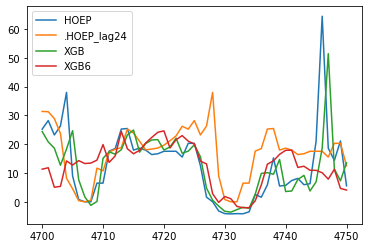

In [6]:
from sklearn.metrics import mean_squared_error
from numpy import corrcoef
import matplotlib.pyplot as plt 
df = data.loc[:8759]

RMSE_lag24 = np.sqrt(mean_squared_error(df.HOEP,df.HOEP_lag24))
print("RMSE HOEP_lag24:",round(RMSE_lag24,2),"Correlation:", corrcoef(df.HOEP,df.HOEP_lag24)[0,1])

RMSE_lag168 = np.sqrt(mean_squared_error(df.HOEP,df.HOEP_lag168))
print("RMSE HOEP_lag168:",round(RMSE_lag168,2),"Correlation:", corrcoef(df.HOEP,df.HOEP_lag168)[0,1])

RMSE_lag360 = np.sqrt(mean_squared_error(df.HOEP,df.HOEP_lag360))
print("RMSE HOEP_lag360:",round(RMSE_lag360,2), "Correlation:", corrcoef(df.HOEP,df.HOEP_lag360)[0,1])

RMSE_XGB = np.sqrt(mean_squared_error(df.HOEP,df.XGB))
print("RMSE XGB:",round(RMSE_XGB,2),"Correlation:", corrcoef(df.HOEP,df.XGB)[0,1])

RMSE_XGB6 = np.sqrt(mean_squared_error(df.HOEP,df.XGB6))
print("RMSE XGB6:",round(RMSE_XGB6,2),"Correlation:", corrcoef(df.HOEP,df.XGB6)[0,1])

RMSE_XGB12 = np.sqrt(mean_squared_error(df.HOEP,df.XGB12))
print("RMSE XGB12:",round(RMSE_XGB12,2),"Correlation:", corrcoef(df.HOEP,df.XGB12)[0,1])

RMSE_XGB24 = np.sqrt(mean_squared_error(df.HOEP,df.XGB24))
print("RMSE XGB24:",round(RMSE_XGB24,2),"Correlation:", corrcoef(df.HOEP,df.XGB24)[0,1])

test = df.loc[4700:4750]
plt.plot(test.HOEP, label = 'HOEP')
plt.plot(test.HOEP_lag24, label = '.HOEP_lag24')
#plt.plot(test.HOEP_lag168, label = '.HOEP_lag168')
#plt.plot(test.HOEP_lag360, label = '.HOEP_lag360')
plt.plot(test.XGB, label = 'XGB')
plt.plot(test.XGB6, label = 'XGB6')
#plt.plot(test.XGB12, label = 'XGB12')
plt.legend(loc='best') 
plt.show()